In [18]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
import skimage
from skimage import exposure


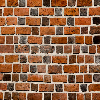

(100, 100, 3)
Prosek:  147.215


In [13]:
# zadatak 1

img = cv2.imread("z1_slika1.jpg")
img = cv2.resize(img, (100, 100))
cv2_imshow(img)
print(img.shape)

average = img[:,::10, 2].mean()
print('Prosek: ', average)

ORIGINAL


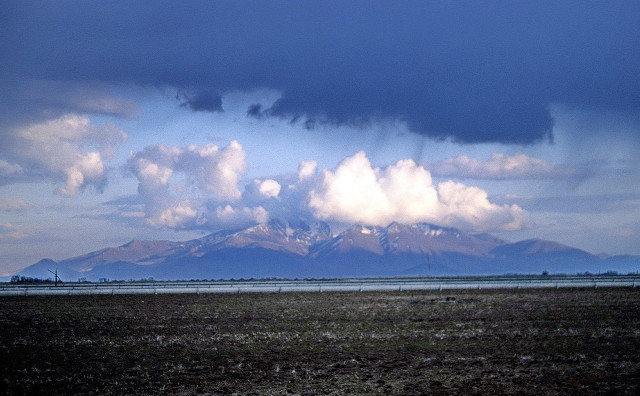

SIVA


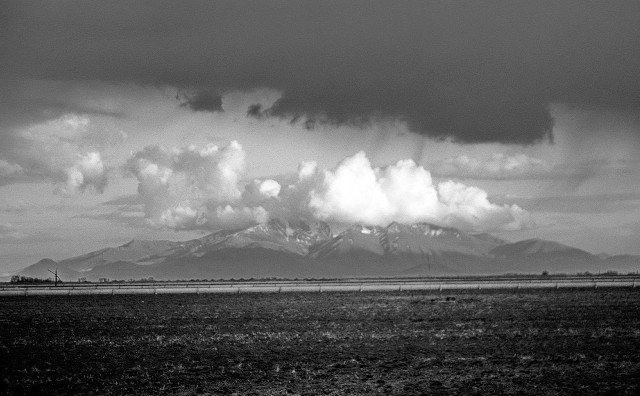

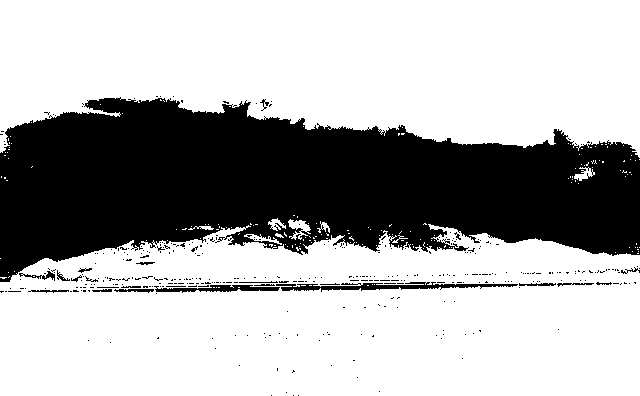

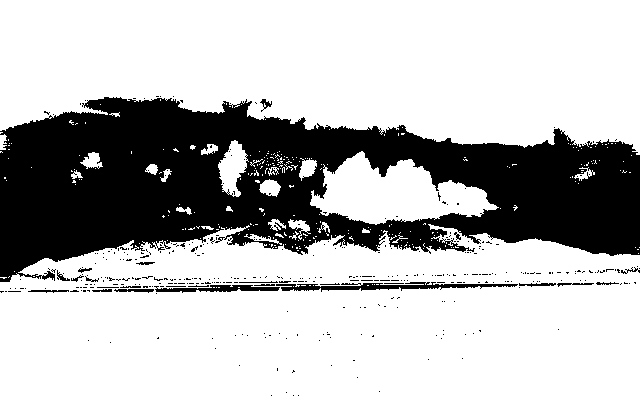

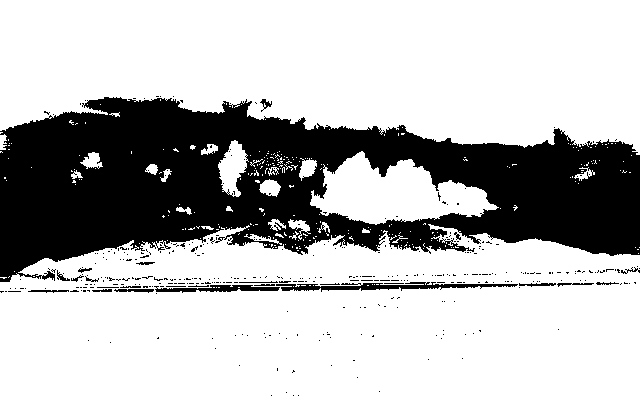

MASKA


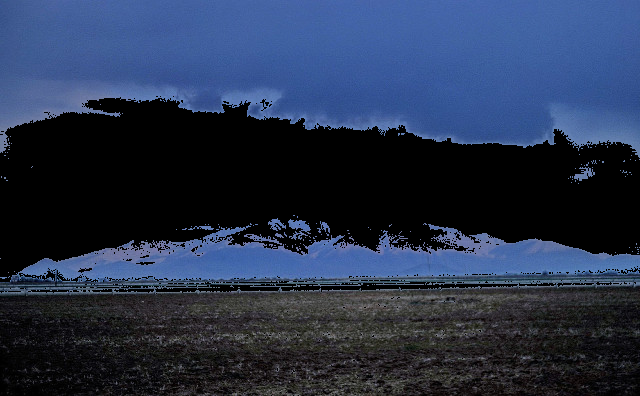

In [14]:
# zadatak 2

img = cv2.imread("z2_slika1.jpg")
print('ORIGINAL')
cv2_imshow(img)

img2 = cv2.imread("z2_slika1.jpg",0)
print('SIVA')
cv2_imshow(img2)

ret, thresh1 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh1)

rows, cols = img2.shape

for i in range(rows):
  for j in range(cols):
    if img2[i, j] < 127 or img2[i, j] > 200:
      img2[i, j] = 255
    else:
      img2[i, j] = 0


cv2_imshow(img2)

ret, thresh2 = cv2.threshold(img2, 200, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh2)

print('MASKA')
res = cv2.bitwise_and(img,img, mask=thresh1)
cv2_imshow(res)


Broj krugova je:  5


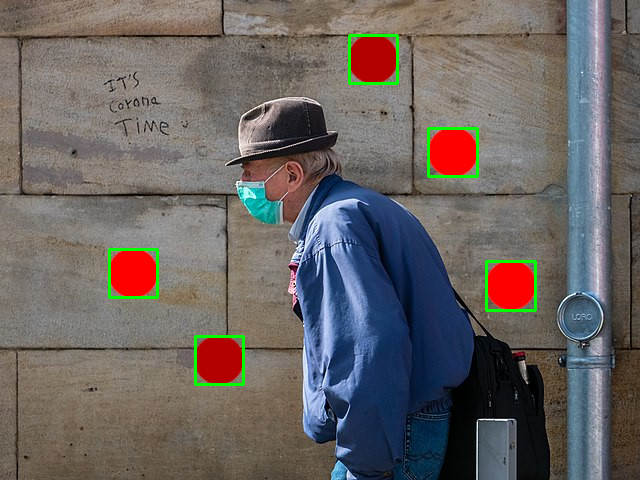

9161.669576031234


In [15]:
# zadatak 3

img3 = cv2.imread("z3_slika1.jpg")
img3_hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)

lower1 = np.array([0, 200, 100])
upper1 = np.array([1, 255, 255])

lower_mask = cv2.inRange(img3_hsv, lower1, upper1)
povrsina_kriga = 0
# iscrtavanje kocke oko krugova
result = img3.copy()
contours = cv2.findContours(lower_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)
    # print("x,y,w,h:",x,y,w,h)
    povrsina_kriga += math.pi * (w/2)*(h/2)

print('Broj krugova je: ', len(contours))

cv2_imshow(result)
print(povrsina_kriga)

In [21]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 1.3 MB/s 
     |████████████████████████████████| 47.8 MB 54 kB/s 


In [35]:
# zadatak 4

images4 = ["z4_slika1.png", "z4_slika2.png", "z4_slika3.jpg", "z4_slika4.png"]

from easyocr import Reader

reader = Reader(["en"], True)

def get_texts_from_image(img):
  global reader
  texts = []

  for bbox, text, prob in reader.readtext(img):
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    texts.append((bbox, text, prob))
  
  return texts

for path in images4:
  img = cv2.imread(path)

  texts = get_texts_from_image(img)

  try:
    for num in texts:
      print(int(num[1]))
  except ValueError as e:
    print(e)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


invalid literal for int() with base 10: 'Fz'
13
invalid literal for int() with base 10: 'cl'
5


Using CPU. Note: This module is much faster with a GPU.


['bonmarche', 'bonmarche']


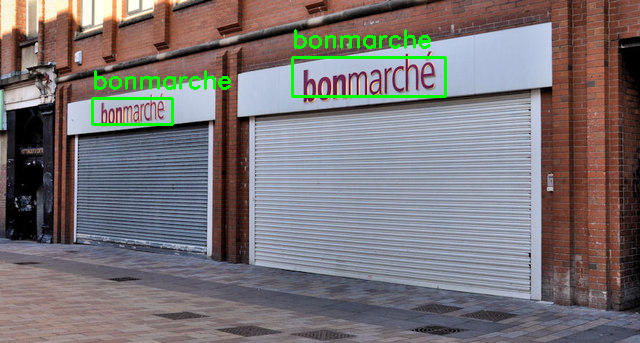

Using CPU. Note: This module is much faster with a GPU.


['Bonmarche']


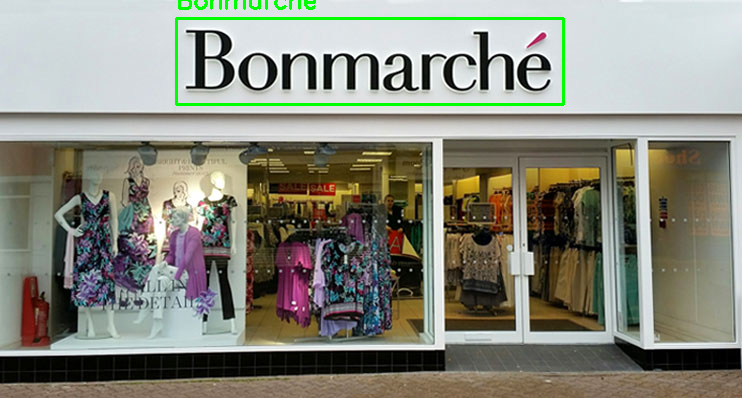

['bonmarche', 'bonmarche']
['Bonmarche']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


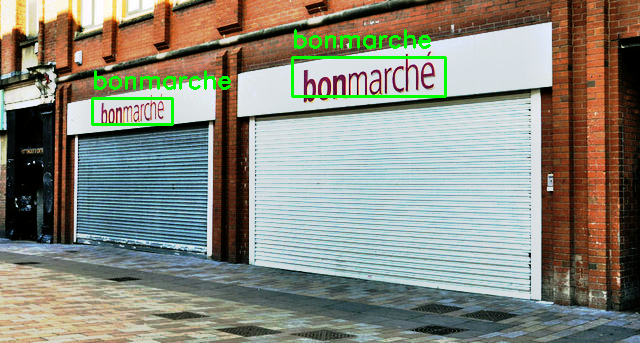

['Bonmarche']
['bonmarche', 'bonmarche']


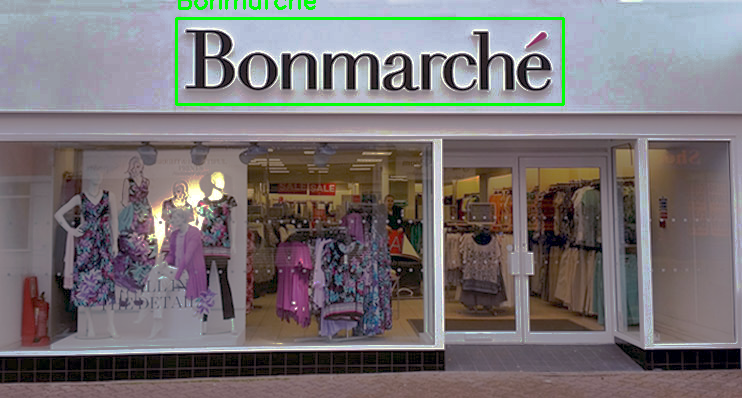

In [45]:
# zadatak 5
from easyocr import Reader
def cleanup_text(text):
  return "".join([c if ord(c) < 128 else "" for c in text]).strip()


langs = ["en"]

img1 = cv2.imread('z5_slika1.jpg')
img2 = cv2.imread('z5_slika2.jpg')
# NE MOGU DA UCITAM SLKE 4 i 5 zadatak 5 u Colab
#img3 = cv2.imread('z5_slika3.JPG')
#img4 = cv2.imread('z5_slika4.jpg')

images = []
images.append(img1)
images.append(img2)
# images.append(img3)
# images.append(img4)

def read_text(img):
  langs = ["en"]
  reader = Reader(langs, False)
  rez = reader.readtext(img)
  texts = []
  for (bbox, text, prob) in rez:
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    text = cleanup_text(text)
    cv2.rectangle(img, tl, br, (0, 255, 0), 2)
    cv2.putText(img, text, (tl[0], tl[1] - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    texts.append(text)
  return img, texts

lista_slika = []
textovi = []

for i in images:
  image, text = read_text(i)
  temp_obj = {
      "slika": i,
      "slika_read": image,
      "text": text,
      "match_id": None
      }
  lista_slika.append(temp_obj)
  print(text)
  textovi = textovi + text
  cv2_imshow(image)

def common_data(list1, list2):
  result = False
  for x in list1:
      for y in list2:
          if x.lower() == y.lower():
              result = True
              return result 
                
  return result


matched = []
for i in range(len(lista_slika)):
  for j in range(len(lista_slika)):
    if common_data(lista_slika[j]["text"], lista_slika[i]["text"]) and i != j:
        if lista_slika[j]["text"] not in matched:
          temp = lista_slika[j]
          temp["match_id"] = i+j
          matched.append(temp)


def match_histograms(lista):
  if len(lista) > 1:
    for i in lista_slika:
      for j in lista_slika:
        if i["match_id"] == j["match_id"] and i != j and i['match_id'] is not None and j['match_id'] is not None:
          print(i["text"])
          print(j["text"])
          matched = exposure.match_histograms(i["slika"], j["slika"], multichannel=True)
          cv2_imshow(matched)
  else:
    pass

match_histograms(matched)
